# Traffic Sign Recognizer ( GTRSB ) 

## Objective 

Develop a CNN model to recognize traffic sign from the GTRSB dataset , further hypertune the model and test the developed model with user input 

## About Dataset

* **Dataset Description**:

The GTSRB dataset is a multi-class, single-object classification dataset designed for traffic sign recognition tasks.

It contains thousands of images of traffic signs belonging to 43 different classes, including speed limits, warning signs, and mandatory signs.

The images were captured from different angles and under varying lighting conditions, making the dataset challenging and realistic.

* **Dataset Contents**:

The dataset is split into two main directories: "Train" and "Test".
The "Train" directory contains 43 subdirectories, one for each traffic sign class. Each subdirectory contains the training images for that particular class.

The "Test" directory contains a CSV file named "Test.csv" and the test image files.

The "Test.csv" file has two columns: "Path" and "ClassId". The "Path" column contains the relative paths to the test image files, and the "ClassId" column contains the corresponding class labels (integers from 0 to 42).

* **Image Properties**:

The images in the dataset are RGB images with varying resolutions.

The majority of the images have a resolution of 64x64 pixels, but some images have different resolutions.

The images contain traffic signs centered within the frame, with varying backgrounds and lighting conditions.



## Basic CNN Architecture 

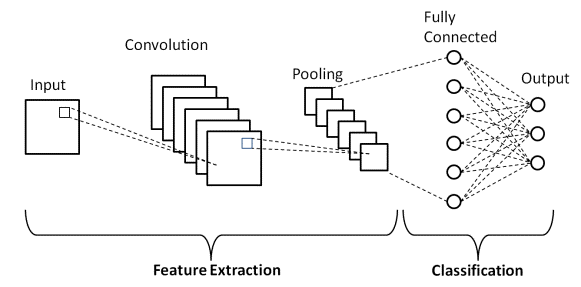

There are three types of layers that make up the CNN which are the convolutional layers, pooling layers, and fully-connected (FC) layers. When these layers are stacked, a CNN architecture will be formed. 

1. **Convolutional Layer**

This layer is the first layer that is used to extract the various features from the input images. In this layer, the mathematical operation of convolution is performed between the input image and a filter of a particular size MxM. By sliding the filter over the input image, the dot product is taken between the filter and the parts of the input image with respect to the size of the filter (MxM).

The output is termed as the Feature map which gives us information about the image such as the corners and edges. Later, this feature map is fed to other layers to learn several other features of the input image.

The convolution layer in CNN passes the result to the next layer once applying the convolution operation in the input. Convolutional layers in CNN benefit a lot as they ensure the spatial relationship between the pixels is intact.

2. **Pooling Layer**

In most cases, a Convolutional Layer is followed by a Pooling Layer. The primary aim of this layer is to decrease the size of the convolved feature map to reduce the computational costs. This is performed by decreasing the connections between layers and independently operates on each feature map. Depending upon method used, there are several types of Pooling operations. It basically summarises the features generated by a convolution layer.

In Max Pooling, the largest element is taken from feature map. Average Pooling calculates the average of the elements in a predefined sized Image section. The total sum of the elements in the predefined section is computed in Sum Pooling. The Pooling Layer usually serves as a bridge between the Convolutional Layer and the FC Layer.

This CNN model generalises the features extracted by the convolution layer, and helps the networks to recognise the features independently. With the help of this, the computations are also reduced in a network.

3. **Fully Connected Layer**

The Fully Connected (FC) layer consists of the weights and biases along with the neurons and is used to connect the neurons between two different layers. These layers are usually placed before the output layer and form the last few layers of a CNN Architecture.

In this, the input image from the previous layers are flattened and fed to the FC layer. The flattened vector then undergoes few more FC layers where the mathematical functions operations usually take place. In this stage, the classification process begins to take place. The reason two layers are connected is that two fully connected layers will perform better than a single connected layer. These layers in CNN reduce the human supervision

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
'''
The np.random.seed() function sets the random seed for NumPy's pseudo-random number generator. 
It's necessary for reproducibility in situations where you want the same sequence of random numbers to be generated every time you run your code.
If the seed it not set , it is very likely that the results will differ every time 
'''
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [2]:
!pip3 install opencv-python 


Note: you may need to restart the kernel to use updated packages.


## Assigning Path for Dataset

In [3]:
data_dir = '../germany_dataset'
train_path = '../germany_dataset/Train'
test_path = '../germany_dataset/'

# Resizing the images to 30x30x3aaaaaa

# 3 channels resemble RGB 
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

## Finding Total Classes

In [4]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [5]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Visualizing The Dataset

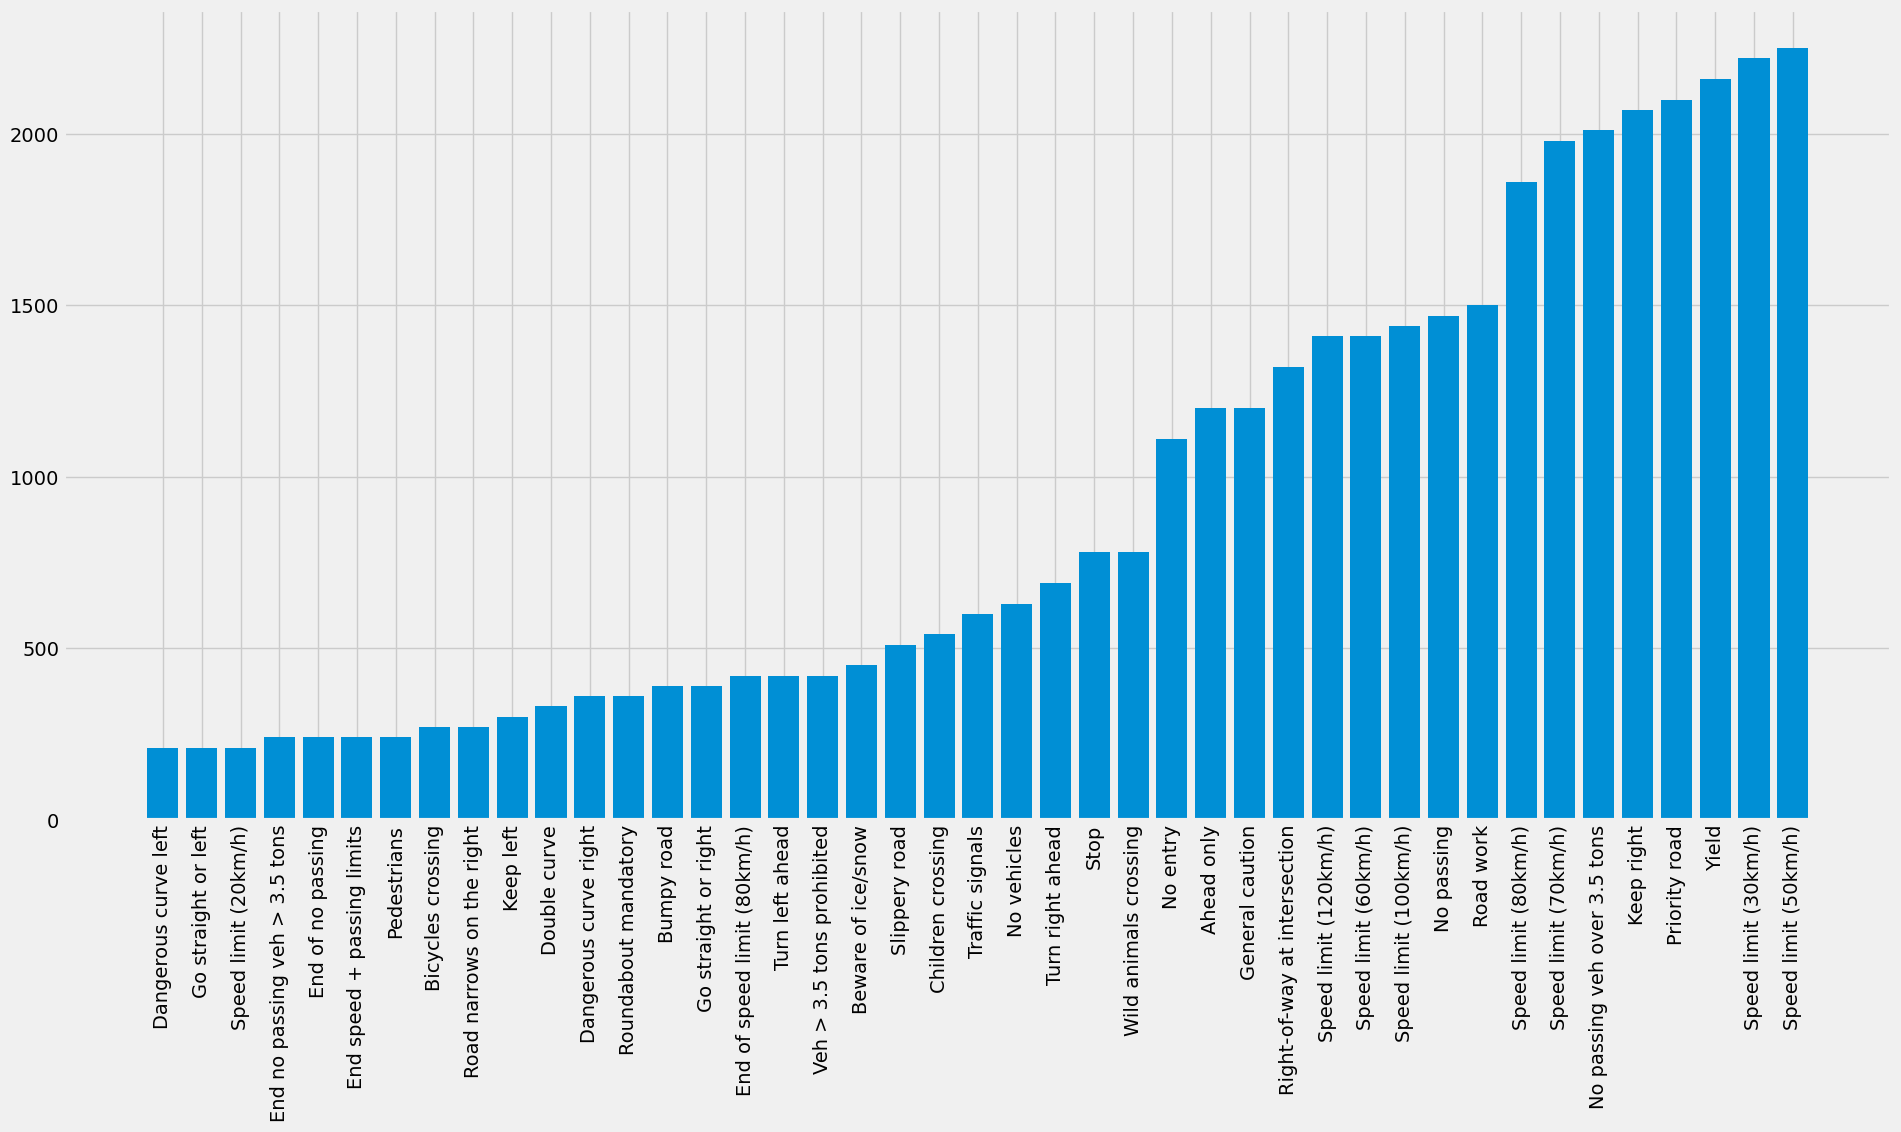

In [6]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    # lists all the files in the current folder being iterated over and assigns them to the train_files variable.
    train_files = os.listdir(train_path + '/' + folder)
    # calculates the number of files in the current folder (train_files) using the len() function, and appends this number to the train_number list.
    train_number.append(len(train_files))
    # converts the folder name (which represents the class label) to an integer (int(folder)) and uses it as an index to retrieve the corresponding class name from the classes dictionary. 
    # The retrieved class name is then appended to the class_num list.
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
# This line "unzips" the sorted pairs back into separate lists, resulting in two lists: one containing the sorted numbers of training files and the other containing the corresponding class names.
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
# 21 inches x 10 inches ( width x height )
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

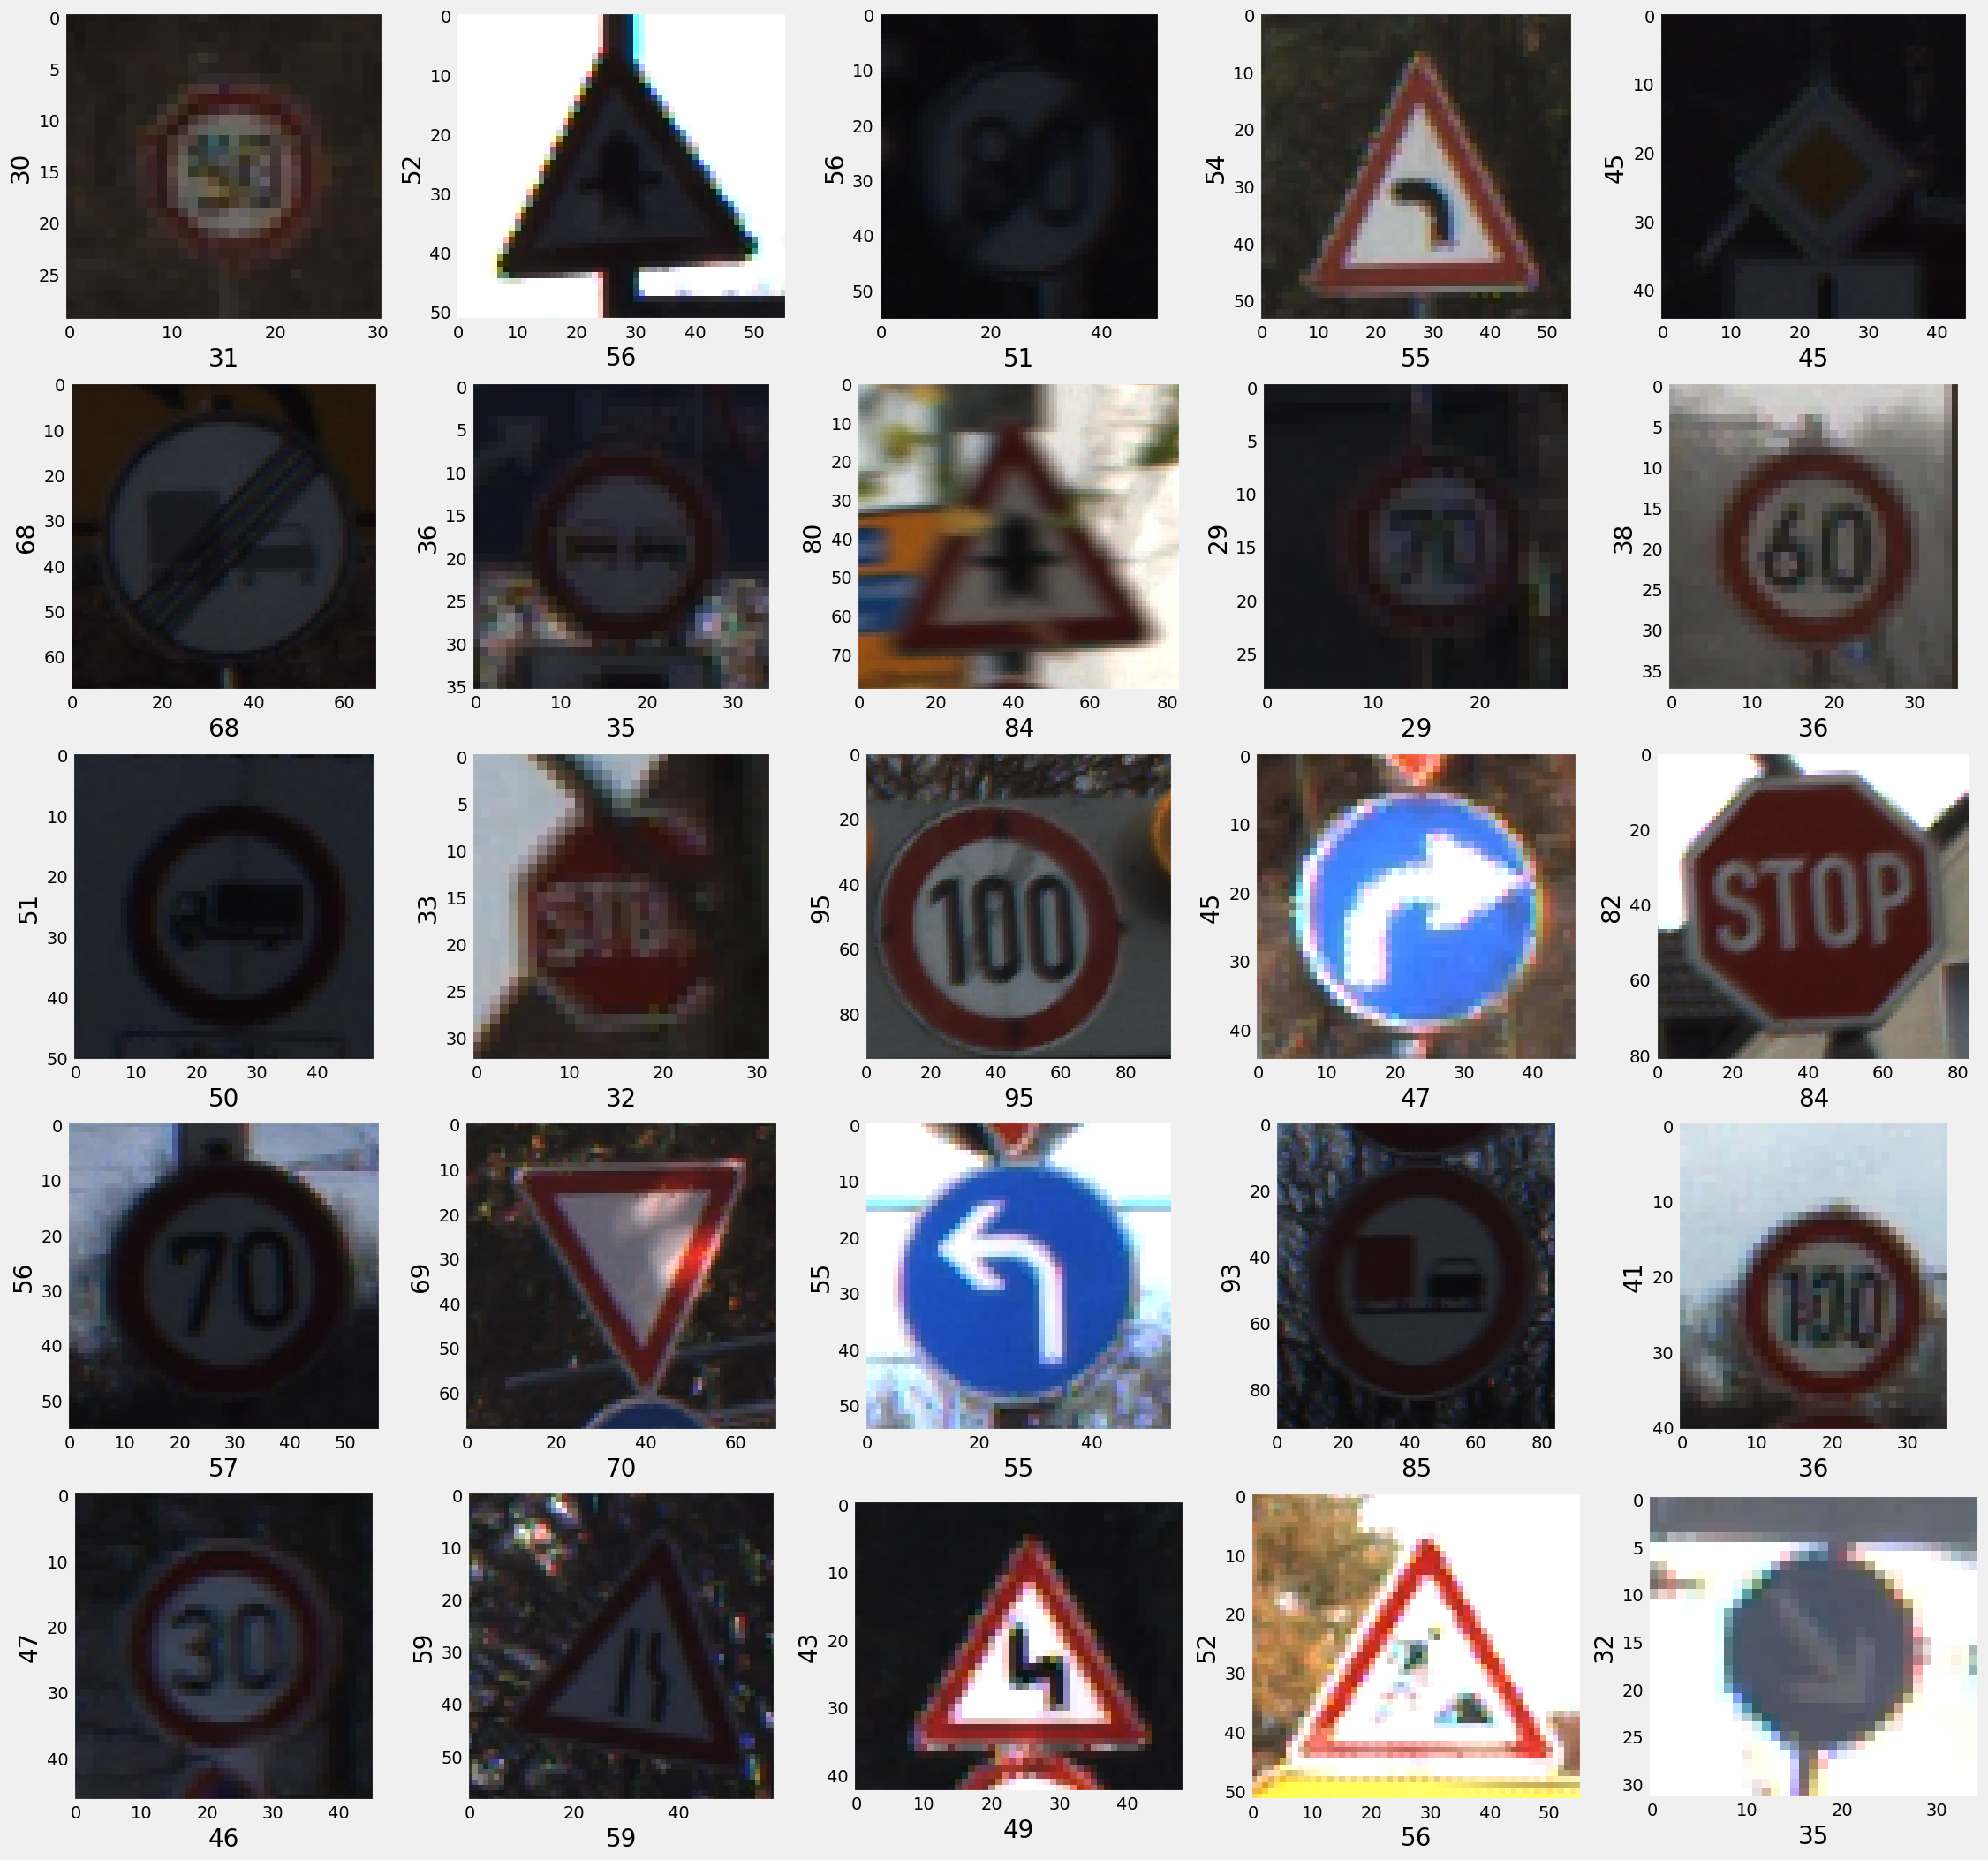

In [7]:
# Visualizing 25 random images from test data
import random
# imread is used to read image file into array 
from matplotlib.image import imread


# plt.imshow(rand_img)
# plt.grid(False)  # Turn off grid lines
# plt.xlabel(rand_img.shape[1], fontsize=20)  # Set the width of the image

test = pd.read_csv(data_dir + '/test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    # creates subplots within the figure. For each iteration of the loop, it selects a subplot position based on the current value of i. 
    # In this case, it creates a grid of 5 rows and 5 columns of subplots, and i determines the position of each subplot within this grid.
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    # b=None will turn off grid lines 
    plt.grid(None)
    # shape[1] corresponds to column 
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    # shape[0] corresponds to rows 
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

###### Resizing the images 

Image resizing is a important step here because if it is not done then input shape mismatch error will occur and will lead to model instabiltiy , loss of information 

### Below cell takes 10mins to run when GPU is enabled 

In [8]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            # resize the images into 30x30 format 
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


39209 - number of images 

30 , 30 - image dimension 

3 - RGB channel 

39209 - number of labels 

## Shuffling the training data

Shuffling the training data is important because if shuffling is not done then the model will learn patterns from the trraining data like after samples of one class , samples of other class will be in order which can lead to overfitting 

In [9]:
# line creates an array of indices ranging from 0 to the number of images in the dataset (image_data.shape[0]). 
# These indices represent the positions of the images in the dataset before shuffling.
shuffle_indexes = np.arange(image_data.shape[0])

# line shuffles the array of indices randomly. The np.random.shuffle() function randomly permutes the elements of an array in place, effectively shuffling the order of the indices.
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

## Splitting the data into train and validation set

Validatiion set is necessary for following reasons : 

1)  The validation set is used to tune the hyperparameters of the model

2) The validation set helps you compare the performance of these models and select the one that generalizes best to unseen data.

3) Monitoring the performance of the model on the validation set helps detect overfitting

Model will overfit the data when the validation loss will stop decreasing or will start increasing . This iindicate that the model is losing ability to generalize things and is starting to overfit the data 

In [10]:
# 30% testing and 70% training 
# additional shuffling ( shuffle = True ) ensures more randomness in data 
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

# Normalizing the data 
'''
Normalization is needed for better generalization of data , stable training and connvergence is more efficient 
'''
X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


## One hot encoding the labels

Without one-hot encoding, categorical labels would be represented as single integers. This representation doesn't capture the relationships between classes and doesn't provide meaningful information to the neural network.

Neural networks trained with categorical labels represented as single integers may still learn to make predictions, but the relationships between classes would be arbitrary. For example, a model might learn that class 3 is "greater" than class 2, but this interpretation would not hold any real-world significance.

In [11]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


## Defining Data Augmentation Configuration

In [12]:
aug = ImageDataGenerator(
    
    # By rotating the images randomly, you introduce variability into the training data, making the model more robust to variations in object orientation.
    # # rotate between -10 to +10 degrees
    rotation_range=10,  
    
    # The zoom range parameter controls the extent to which random zooms are applied to the images. 
    # Randomly zooming in or out of the images simulates the effect of capturing objects from different distances, helping the model generalize better to objects of varying sizes.
    # Will range between [1-zoom_range] , [1+zoom_range]
    zoom_range=0.15,
    
    # These parameters control the range of horizontal and vertical shifts that can be applied to the images. 
    # Shifting the images horizontally or vertically mimics the effect of capturing objects from slightly different perspectives or positions, making the model more tolerant to changes in object location within the images.
    
    width_shift_range=0.1,
    height_shift_range=0.1,
    # Shearing involves tilting the image along its axis. The shear range parameter determines the intensity of the shearing effect applied to the images. 
    # Shearing can help the model learn to recognize objects from different viewpoints, improving its ability to generalize to unseen data.
    shear_range=0.15,
    
    # enable random horizontal or vertical flipping of the images. Flipping images horizontally or vertically introduces additional variations, such as changes in object orientation or symmetry, which can enhance the model's robustness.
    horizontal_flip=False,
    vertical_flip=False,
    
    # "nearest" fill mode is a method used to determine how to fill in newly created pixels when applying transformations like rotation, shifting, or zooming to an image.
    fill_mode="nearest")

## Tuning the Model to find best parameters 

### Below cell takes 30mins to execute when GPU is enabled 

In [14]:
import kerastuner as kt

def model_builder(hp):
    # Sequential model - linear stack of layers 
    model = keras.Sequential()

    # Tune the number of units in the first Conv2D layer
    hp_filters1 = hp.Int('filters1', min_value=16, max_value=128, step=16)
    # kernel_size=(3,3) --> This means that the convolution operation will be applied using a 3x3 filter over the input data.
    '''
    'relu' stands for Rectified Linear Unit, which is a commonly used activation function in deep learning.
    ReLU activation is chosen here because it introduces non-linearity into the model, helping it learn complex patterns in the data.
    Using other activation functions like sigmoid or tanh may lead to vanishing gradients or slower convergence in deep neural networks. 
    ReLU is preferred because it addresses these issues and provides faster training.
    '''
    model.add(keras.layers.Conv2D(filters=hp_filters1, kernel_size=(3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, channels)))

    
    
    # Tune the number of units in the second Conv2D layer
    hp_filters2 = hp.Int('filters2', min_value=32, max_value=256, step=32)
    model.add(keras.layers.Conv2D(filters=hp_filters2, kernel_size=(3, 3), activation='relu'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    '''
    The MaxPooling2D layer reduces the spatial dimensions (width and height) of the input volume.
    It achieves this by sliding a 2x2 pooling filter over the input and taking the maximum value within each 2x2 region.
    This helps in reducing the computational complexity of the model by downsampling the feature maps and extracting the most important features.
    '''
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    '''
    Batch normalization is a technique used to improve the training stability and accelerate the convergence of deep neural networks.
    It normalizes the activations of the previous layer, ensuring that they have zero mean and unit variance.
    The axis=-1 parameter indicates that normalization is applied along the last axis of the input tensor, which typically corresponds to the feature dimension.
    '''
    model.add(keras.layers.BatchNormalization(axis=-1))
    
    # These layers perform convolution operations on the input feature maps using learnable filters.
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
    
    # this layer further reduces the spatial dimensions of the feature maps.
    # By downsampling the feature maps, it retains the most important information while reducing computational complexity.
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    # this layer normalizes the activations of the previous layer, improving the stability and convergence of the model.
    model.add(keras.layers.BatchNormalization(axis=-1))
    
    # The Flatten layer reshapes the 2D feature maps into a 1D vector, preparing them to be fed into the fully connected layers (Dense layers) of the neural network.
    # It converts the spatial information in the feature maps into a one-dimensional representation, which is required for the subsequent dense layers.
    model.add(keras.layers.Flatten())

    # Tune the number of units in the Dense layer
    # units --> number of neurons in the dense layer 
    
    hp_units = hp.Int('units', min_value=256, max_value=1024, step=256)
    #  line adds a Dense (fully connected) layer to the model.
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    # normalizes the activations of the previous layer, improving the stability and convergence of the model during training.
    model.add(keras.layers.BatchNormalization())
    # Dropout is a regularization technique that randomly sets a fraction (specified by the rate parameter) of input units to zero during training.
    # It helps prevent overfitting by reducing the reliance of the model on specific neurons and encourages robustness.
    model.add(keras.layers.Dropout(rate=0.5))
    
    
    # This line adds the output Dense layer to the model.
    # The activation parameter is set to 'softmax', which applies the softmax activation function to produce probability scores for each class.
    model.add(keras.layers.Dense(43, activation='softmax'))

    
    # 'categorical_crossentropy'is commonly used for multi-class classification problems.
    '''
    Why Adam optimizer is used ? 

    1. Adaptive Learning Rates: Adam adapts the learning rates for each parameter individually, based on the past gradients and updates. This adaptiveness helps converge faster and more reliably compared to optimizers with fixed learning rates.
  
    2. Efficiency: Adam maintains per-parameter learning rates and exponentially decaying average of past gradients, which makes it computationally efficient. It typically requires less tuning of hyperparameters compared to other optimizers.

    3. Robustness: Adam performs well on a wide range of deep learning tasks and architectures. It is less sensitive to the choice of hyperparameters and often converges smoothly.
    '''
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# kt.Hyperband is a hyperparameter tuner that implements the Hyperband algorithm, which is an adaptive resource allocation algorithm for hyperparameter optimization.
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     
                     # This parameter specifies the reduction factor for the number of epochs and resources allocated in each successive round of the Hyperband algorithm.
                     # In each successive round, the number of configurations evaluated is reduced by a factor of factor, while the resources allocated to each configuration are increased accordingly.
                     factor=3,
                     directory='my_dir',
                     project_name='traffic_sign_recognition')

# This parameter specifies the number of epochs with no improvement after which training will be stopped. Here, training will stop if there is no improvement in validation loss for 5 consecutive epochs.
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(aug.flow(X_train, y_train, batch_size=32),
             epochs=1,
             validation_data=(X_val, y_val),
             callbacks=[stop_early])

# Get the optimal hyperparameters
# When you set num_trials = 1, it means you are asking the tuner to return only the single best set of hyperparameters found during the search process. 
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"The optimal number of filters in the first Conv2D layer is {best_hps.get('filters1')}")
# print(f"The optimal number of filters in the second Conv2D layer is {best_hps.get('filters2')}")
# print(f"The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}")
# print(f"The optimal number of units in the Dense layer is {best_hps.get('units')}")


# Get the optimal hyperparameters
# When you set num_trials = 1, it means you are asking the tuner to return only the single best set of hyperparameters found during the search process.
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("The optimal number of filters in the first Conv2D layer is:", best_hps.get('filters1'))
print("The optimal number of filters in the second Conv2D layer is:", best_hps.get('filters2'))
print("The optimal learning rate for the optimizer is:", best_hps.get('learning_rate'))
print("The optimal number of units in the Dense layer is:", best_hps.get('units'))

Trial 3 Complete [00h 03m 14s]
val_accuracy: 0.9824874401092529

Best val_accuracy So Far: 0.9824874401092529
Total elapsed time: 00h 11m 08s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
32                |16                |filters1
32                |128               |filters2
0.01              |0.001             |learning_rate
1024              |1024              |units
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
732/858 [========================>.....] - ETA: 9s - loss: 3.4256 - accuracy: 0.2291

KeyboardInterrupt: 

The loss function measures how well the model's predictions match the actual target values during training. It quantifies the error between predicted and actual values. The optimizer adjusts the model's parameters (weights and biases) during training to minimize the loss function. It determines the direction and magnitude of the updates made to the model's parameters to improve its performance over time.

## Making the model

In [ ]:
# Build the model with the optimal hyperparameters and train it
# Using large batch size will lead to faster training but will use more memory 
# Using smaller batch size will lead to slower training but will lead to introduction of noise 
# So batch size should be moderate , in most cases 32 is used 
model = tuner.hypermodel.build(best_hps)
history = model.fit(aug.flow(X_train, y_train, batch_size=32),
                    epochs=30,
                    validation_data=(X_val, y_val))

## Evaluating the model

In [ ]:
'''
plt.gca() stands for "get current axes". It is a function in Matplotlib that returns the current Axes instance. The Axes instance represents the coordinate system where the data is plotted.

set_ylim(0, 1) is a method of the Axes object returned by plt.gca(). 
It sets the limits of the y-axis of the plot. In this case, it sets the lower limit to 0 and the upper limit to 1, ensuring that the y-axis range of the plot spans from 0 to 1. 
This is commonly used when plotting metrics like accuracy or loss, where the values are typically in the range of 0 to 1. 
'''

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Above graph shows the training loss ( blue ) and the validation loss ( yellow ) both tend to decrease which is a good sign for the performance of the model and both training accuracy ( red ) and the validation accuracy ( green ) tend to increase over time which is again a good sign for the model 

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the probabilities of the positive class
y_probs = model.predict_proba(X_val)

# Compute ROC curve and ROC area for each class
# [:, 1]: This part is a slicing operation that selects all rows (:) and only the second column (1) of the y_val array.
# The reason for using [:, 1] here is that roc_curve expects the true labels to be binary indicators of the positive class.
fpr, tpr, _ = roc_curve(y_val[:, 1], y_probs[:, 1]) 
roc_auc = roc_auc_score(y_val[:, 1], y_probs[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


ROC curve above suggest that AUC ( Area under curve ) for the model is 1 , which can be a sign for overfitting , but in this case it is not beacuse as seen in the above loss and accuracy graph there is no sign for the model overfitting . This indicates a excellent model 

## Loading the test data and running the predictions

In [ ]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = model.predict_classes(X_test)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

## Visualizing the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
# annot = True will display value associated with each cell 
sns.heatmap(df_cm, annot=True)

## Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels, pred))

## Predictions on Test Data

In [ ]:
plt.figure(figsize=(25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    actual_label = classes[actual]
    pred_label = classes[prediction]
    plt.xlabel('Actual={}\n({})\nPred={}\n({})'.format(actual, actual_label, prediction, pred_label), color=col)
    plt.imshow(X_test[start_index + i])

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


## Testing on User Input 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the input image
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Resize the image to match the input size of the model
    image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH))
    # Normalize the pixel values
    image = image / 255.0
    # Expand the dimensions to match the input shape expected by the model
    image = np.expand_dims(image, axis=0)
    return image

# Function to make predictions on the input image
def predict_image(image_path):
    # Preprocess the input image
    image = preprocess_image(image_path)
    # Make predictions using the model
    predictions = model.predict(image)
    # Get the predicted class
    predicted_class = np.argmax(predictions)
    # Get the predicted class label
    predicted_label = classes[predicted_class]
    # Display the image and the predicted label
    plt.imshow(cv2.imread(image_path))
    plt.title(f'Predicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/kaggle/input/gtsrb-german-traffic-sign/Test/00001.png'
predict_image(image_path)
